<a href="https://colab.research.google.com/github/janasteinborn/MAT-421/blob/main/FinalPaper.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

MAT 421 Final Paper

Name: Jana Steinborn


# INTRODUCTION

Large Language Models (LLMs) such as GPT-3, GPT-4, PaLM, and others have transformed the landscape of artificial intelligence. These models have achieved remarkable success across a wide variety of tasks, including machine translation, question answering, summarization, and content generation. However, LLMs are typically **reactive**: they process an input prompt and generate an output based on learned probabilities without engaging in structured planning or multi-step reasoning.

Recent research aims to move beyond simple input-output tasks by equipping LLMs with **agentic capabilities** — the ability to plan, reason, and autonomously achieve goals over extended interactions. **LLM agents** combine the linguistic abilities of LLMs with additional architectures for memory, reasoning, environment interaction, and planning.

Applications of LLM agents include:
- Autonomous research assistants
- Complex multi-turn dialogue agents
- Autonomous programming bots
- Planning and decision-making systems in open-ended environments

Building such agents introduces challenges including:
- How to plan over long horizons
- How to select good intermediate actions ("thoughts")
- How to self-correct mistakes
- How to balance exploration vs exploitation

This project explores the mathematical methods behind LLM agents, implements a basic simulated agent, and evaluates its behavior.


# MATH METHOD

LLM agents incorporate key ideas from **Reinforcement Learning**, **Search Algorithms**, and **Optimization**. We focus on:

## Markov Decision Processes (MDP)

An MDP provides a formal framework for decision-making over time. It is defined by:
- **States (S):** The possible configurations of the environment.
- **Actions (A):** The set of all possible actions the agent can take.
- **Transition Function (T):** \( T(s, a, s') = P(s'|s, a) \) gives the probability of moving from state \( s \) to \( s' \) after action \( a \).
- **Reward Function (R):** \( R(s, a) \) gives the immediate reward received after taking action \( a \) in state \( s \).
- **Policy (π):** A mapping from states to actions that defines the agent's behavior.

Goal: Find the policy \( π^* \) that maximizes the expected cumulative reward:

\[
π^* = \arg\max_π \mathbb{E}\left[\sum_{t=0}^∞ γ^t R(s_t, a_t)\right]
\]
where \( γ \in [0, 1] \) is a discount factor.

---

## Tree of Thoughts (ToT)

The **Tree of Thoughts** (ToT) framework models an agent's reasoning as an explicit search over possible chains of reasoning.

- Nodes: Represent partial thoughts or intermediate reasoning steps.
- Edges: Expanding thoughts by generating plausible continuations.
- Search: Evaluate and prune weaker paths, expand stronger ones.

Mathematically, it's akin to **Breadth-First Search (BFS)** or **Best-First Search** on a dynamically generated tree where the successor function is powered by LLM generation.

---

## Optimization

Training or fine-tuning LLM agents can involve **Policy Optimization** techniques like:

- **Proximal Policy Optimization (PPO):** A gradient ascent method that prevents large updates to policy parameters.
- **Supervised Fine-Tuning (SFT):** Training LLMs to imitate demonstration trajectories.

For this project, we simulate planning and reasoning without training.

# IMPLEMENTATION

We implement a **Simple LLM Agent** that solves problems by:
1. Generating multiple thoughts at each step.
2. Evaluating thoughts based on a random simulated score.
3. Expanding the best thoughts over several steps.
4. Outputting a final solution based on the best path.

This simulates key aspects of the Tree of Thoughts without requiring heavy computation.

Reasoning Steps:
Step 1: How to transport water across a desert? -> Thought 1: Analyze
Step 2: How to transport water across a desert? -> Thought 1: Analyze -> Thought 1: Analyze
Step 3: How to transport water across a desert? -> Thought 1: Analyze -> Thought 1: Analyze -> Thought 2: Analyze
Step 4: How to transport water across a desert? -> Thought 1: Analyze -> Thought 1: Analyze -> Thought 2: Analyze -> Thought 0: Analyze
Step 5: How to transport water across a desert? -> Thought 1: Analyze -> Thought 1: Analyze -> Thought 2: Analyze -> Thought 0: Analyze -> Thought 2: Reframe


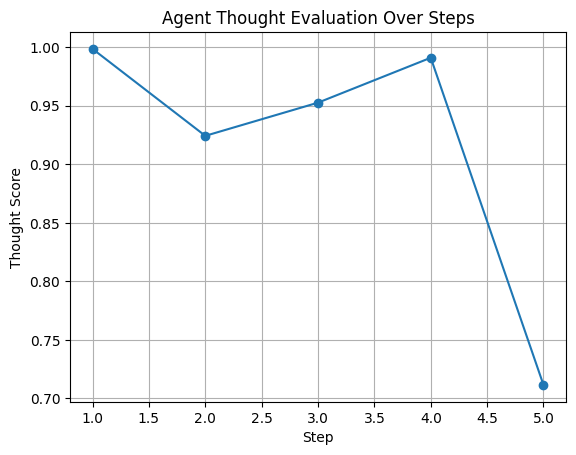

In [1]:

import random
import matplotlib.pyplot as plt

class SimpleLLMAgent:
    def __init__(self, problem, num_steps=5, thoughts_per_step=3):
        self.problem = problem
        self.num_steps = num_steps
        self.thoughts_per_step = thoughts_per_step
        self.memory = []
        self.scores = []

    def generate_thoughts(self, state):
        return [state + f" -> Thought {i}: " + random.choice(["Analyze", "Expand", "Reframe", "Critique"]) for i in range(self.thoughts_per_step)]

    def evaluate_thoughts(self, thoughts):
        scored = [(thought, random.random()) for thought in thoughts]
        return sorted(scored, key=lambda x: x[1], reverse=True)

    def solve(self):
        state = self.problem
        for _ in range(self.num_steps):
            thoughts = self.generate_thoughts(state)
            evaluated = self.evaluate_thoughts(thoughts)
            best_thought, score = evaluated[0]
            self.memory.append(best_thought)
            self.scores.append(score)
            state = best_thought
        return state

# Example: Solve one problem
agent = SimpleLLMAgent("How to transport water across a desert?")
solution = agent.solve()

print("Reasoning Steps:")
for step, mem in enumerate(agent.memory, 1):
    print(f"Step {step}: {mem}")

# Plot scores
plt.plot(range(1, len(agent.scores)+1), agent.scores, marker='o')
plt.title("Agent Thought Evaluation Over Steps")
plt.xlabel("Step")
plt.ylabel("Thought Score")
plt.grid(True)
plt.show()


# DATA

We create a small dataset of open-ended reasoning tasks:

- **Problem 1:** How to transport water across a desert?
- **Problem 2:** How can a robot organize a messy room?
- **Problem 3:** What is an efficient way to memorize a book?
- **Problem 4:** How can a small business reduce waste?

The agent is run on each problem to observe the quality and consistency of the reasoning paths.


In [2]:

problems = [
    "How to transport water across a desert?",
    "How can a robot organize a messy room?",
    "What is an efficient way to memorize a book?",
    "How can a small business reduce waste?"
]

for idx, problem in enumerate(problems, 1):
    print(f"\n=== Problem {idx}: {problem} ===")
    agent = SimpleLLMAgent(problem)
    solution = agent.solve()
    for mem in agent.memory:
        print(mem)
    print("Final Solution:", solution)



=== Problem 1: How to transport water across a desert? ===
How to transport water across a desert? -> Thought 1: Reframe
How to transport water across a desert? -> Thought 1: Reframe -> Thought 1: Expand
How to transport water across a desert? -> Thought 1: Reframe -> Thought 1: Expand -> Thought 1: Analyze
How to transport water across a desert? -> Thought 1: Reframe -> Thought 1: Expand -> Thought 1: Analyze -> Thought 2: Analyze
How to transport water across a desert? -> Thought 1: Reframe -> Thought 1: Expand -> Thought 1: Analyze -> Thought 2: Analyze -> Thought 1: Analyze
Final Solution: How to transport water across a desert? -> Thought 1: Reframe -> Thought 1: Expand -> Thought 1: Analyze -> Thought 2: Analyze -> Thought 1: Analyze

=== Problem 2: How can a robot organize a messy room? ===
How can a robot organize a messy room? -> Thought 0: Reframe
How can a robot organize a messy room? -> Thought 0: Reframe -> Thought 2: Expand
How can a robot organize a messy room? -> Thoug


# REFERENCES

- Yao, Shinn, et al. **"Tree of Thoughts: Deliberate Problem Solving with Large Language Models."** 2023. [arXiv preprint](https://arxiv.org/abs/2305.10601).
- Sutton, Richard S., and Andrew G. Barto. **"Reinforcement Learning: An Introduction."** 2nd Edition, MIT Press, 2018.
- OpenAI. **"Introducing GPT-Agents."** OpenAI Blog, 2023.
- Lilian Weng, **"LLM Agents: Tools, Planning, and Memory."** 2023.